# Neural Networks

Sometimes it's impossible to model the dependent variable Y as a linear equation of the independent variable X. We could model the dependent variable Y to be a high order polynomial equation of the dependent variable X, thus converting the problem into the standard form of linear regressions.

It can also be seing that calculating the weights or coefficients of all the terms in a polynomial function using gradiend descent has a time complexity of O(n^2), where n is the numer of features in the training data. Similarly, the algorithmic complexity of calculating the coefficients of all the terms in a third-order polynomial equation is O(n^3). It's apparent that the time complexity of gradient descent increases geomtrically with the number of features of the model. Thus, gradient descent on its own is not efficient enough yo model nonlinear regression models with a large number of features.

ANNs, on the other hand, are very efficient at modeling nonlinear regression models of data with a high number of features. ANNs are modeled form the behavior of the central nervous system of organisms. The brain processes information and generates electric signals that are transported thorugh the network of neural fibers to the various organs of the organism. **The actual processing of sensoty signals, however, is performed by several complex combinations of these neurons**. Of course, each neuron is capable of preocessing an exremely small portion og the information preocessed by the brain.

The dendrites are used to receive signals from other neuros and can be thought of as the input to the neuron. Similarly, the axon the the neuron is analougous to the output of the neuron. The neuron can thus be mathematically represented as a function that processes several inputs and produces a single output. The interconnecting space between two neurons is called a **synapse**.

**Perceptron** can be used on its own and is effective enough to estimate supervised machine learning models such as **linear regression** and **logistic regression**. However, complex nonlinear data can be better modeled with several interconnected perceptrons. The **problem** is that it never converges if the classes are not perfectly linearly separable. Although it's possible to change the learning rate and increase the number of epochs, the perceptron will never converge.

ANNs can be braoadly classified into **feed-forward neural networks** and **recurrent neural networks**. The difference between these two types of ANNs is that in feed-forward neural networks, the conections between nodes ot the ANN do not form a directed cycle as opposed yo recurrent neural networks where the node interconnections do form a directed cycle. Thus, in feed-forward neural networks, each node in a given layer of the ANN receives input only from the nodes in the immediate previous layer of the ANN.

### Multilayer Perceptron

This model represents a basic feed-forward neural network and is versatile enough to model regression and classificaiton problem in the domain of supervised learning. All the inputs flow through a feed-forward neural network in a single direction. This is direct consequence of the fact that **there is no feddback** from or to any layer in a feed-forward neural network.

Usin a single layer of perceptrons would mea using only a single activation function, which is the equivalent to using **logistic regression** to model the training data. This would mean that the model cannot fit nonlinear data, which is the primary innovation of ANNs.

We can use a multilayer peceptron to perform a **binary or multiclass classifications**. A multilayer perceptron ANN can be trained using the **backpropagation algorithm**.

### Backpropagation algorithm

The backpropagation algorithm is used to train a multilayer perceptron ANN from a given set of sample values. A large number or iterations must be performed until the overall error in the ANN converges to a small value.
The algorithm comprises three distinct phases.
1. A forward propagation phase.
    * Initialize the weights synapses of the ANN to random values.
2. A backpropagation phase
    * Error computation
    * Calculate the product of the errors with the synape weights or input activations. This step produces the gradient.
3. A weight update phase
    * The learning rate and learning momentum come into play.
4. Repeat 2 and 3 for the rest of the samples in the training data.    
   

In [5]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/6/6f/Gjl-t%28x%29.svg')

### Code

In [6]:
import numpy as np

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x): # derivative
    return sigmoid(x)*(1.0-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x): # derivative
    return 1.0 - x**2

In [33]:
class NeuralNetwork:

    def __init__(self, layers, activation='tanh'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_prime
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_prime

        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
         
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]

            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: print 'epochs:', k

    def predict(self, x): 
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=0)      
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a
        
    if __name__ == '__main__':
        pass

In [35]:
nn = NeuralNetwork([2,2,1])
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])
nn.fit(X, y)
for e in X:
    print(e,nn.predict(e))

epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
(array([0, 0]), array([  2.90456431e-06]))
(array([0, 1]), array([ 0.99618694]))
(array([1, 0]), array([ 0.99719177]))
(array([1, 1]), array([ -1.84135890e-05]))


### Tiny Layer network

In [39]:
import numpy as np

# sigmoid function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# output dataset            
y = np.array([[0,0,1,1]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1

for iter in xrange(10000):

    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))

    # how much did we miss?
    l1_error = y - l1

    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)

    # update weights
    syn0 += np.dot(l0.T,l1_delta)

print "Output After Training:"
print l1

Output After Training:
[[ 0.00966449]
 [ 0.00786506]
 [ 0.99358898]
 [ 0.99211957]]


## Layer Neural Network (deep learning)

In [3]:
import numpy as np

def nonlin(x,deriv=False):
	if(deriv==True):
	    return x*(1-x)

	return 1/(1+np.exp(-x))
    
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
                
y = np.array([[0],
			[1],
			[1],
			[0]])

np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

for j in xrange(60000):

	# Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2
    
    if (j% 10000) == 0:
        print "Error:" + str(np.mean(np.abs(l2_error)))
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)


Error:0.496410031903
Error:0.00858452565325
Error:0.00578945986251
Error:0.00462917677677
Error:0.00395876528027
Error:0.00351012256786


## Training a Perceptron via scikit-learn

In [1]:
%matplotlib inline

In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]] # we use two features for visualization purposes
y = iris.target

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 0)

Many machine learning and optimization algorithms also require feature scaling for optimal performance, for example **gradient descent**.

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # Normal Standard deviation of u and sigma parameters
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Having standarized the training data, we can now train a perceptron model. Most algorithms is scikit-learn already support multiclass classificaiton bia **One-vs-Rest (OVR)** method.

In [5]:
from sklearn.linear_model import Perceptron
# eta0 = learning rate
# n_iter = number of epochs (passes over the training set)
# Random state is used for reproducibility of the initial shuffiling
# of the training dataset
ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

Finding the appropriate learning rate requires some experimentation. If it's too large, the algorithm will overshoot the global cost minimum. If it's too small, the algorithm requires more epochs until convergence, which can make the learning slow.

In [6]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [7]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


### Decision regions

In [8]:
from plotting import *

/Users/b3j90/anaconda/envs/nlp/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Users/b3j90/anaconda/envs/nlp/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


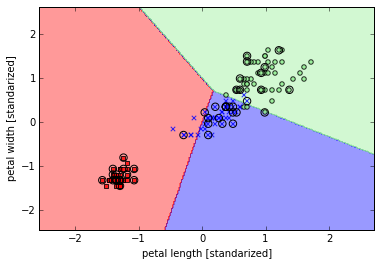

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y= y_combined, classifier=ppn,
                     test_idx=range(104,150), xlabel="petal length [standarized]",
                     ylabel = 'petal width [standarized]', legend_loc = 'upper left')